Determining which news articles are similar to each other and which tweets are more similar to each other.  In order to accomplish this I create n-grams and compare the similarity of the text using Jaccard distance.

In [231]:
import pandas as pd

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 500)

#### Read news data

In [232]:
news_path = 'https://storage.googleapis.com/msca-bdp-data-open/news/nlp_a_3_news.json'
news_df = pd.read_json(news_path, orient='records', lines=True)

print(f'Sample contains {news_df.shape[0]:,.0f} news articles')
news_df.head(2)

Sample contains 1,018 news articles


,url,date,language,title,text
0,https://auto.hindustantimes.com/lml-bikes/dealers/bodh-gaya,2022-01-21,en,Lml Bikes Car Dealers - Lml Bikes Showrooms in India,"Lml Bikes Car Dealers - Lml Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersCar NewsBik..."
1,https://auto.hindustantimes.com/pure-ev-bikes/dealers/avadi,2022-01-21,en,Pure Ev Bikes Car Dealers - Pure Ev Bikes Showrooms in India,"Pure Ev Bikes Car Dealers - Pure Ev Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersCar..."


#### Read Tweets data

In [ ]:
tweets_path = 'https://storage.googleapis.com/msca-bdp-data-open/tweets/nlp_a_3_tweets.json'
tweets_df = pd.read_json(tweets_path, orient='records', lines=True)
print(f'Sample contains {tweets_df.shape[0]:,.0f} tweets')
tweets_df.head(2)

In [234]:
news_df['title_tokens'] = news_df['title'].apply(lambda x : nltk.tokenize.word_tokenize(x))
news_df['title_tokens']

0                                                                                                       [Lml, Bikes, Car, Dealers, -, Lml, Bikes, Showrooms, in, India]
1                                                                                             [Pure, Ev, Bikes, Car, Dealers, -, Pure, Ev, Bikes, Showrooms, in, India]
2                                               [Syncron, Price, Selected, by, Mitsubishi, Motors, Corporation, to, Boost, Enhanced, Service, Parts, Pricing, Strategy]
3                                                                                                    [Mahindra, Teases, Its, Future, Electric, Lineup, !, |, Motoroids]
4                                                                                                     [Jawa, Bikes, Car, Dealers, -, Jawa, Bikes, Showrooms, in, India]
                                                                                     ...                                                                        

In [235]:
news_df['text_tokens'] = news_df['text'].apply(lambda x : nltk.tokenize.word_tokenize(x))
news_df['text_tokens'].head(1)

0    [Lml, Bikes, Car, Dealers, -, Lml, Bikes, Showrooms, in, India, Explore, Friday, ,, 21, January, 2022, Log, in/Sign, up, SearchNotificationsTop, SectionsAuto, NewsCar, NewsBike, NewsLatestAuto, NewsPhotosVideosElectric, VehiclesTrendingMy, ReadsOffersnewFind, carsFind, bikesCompare, carsCompare, bikesEMI, calculatorDealersExplore, AutoAbout, UsContact, UsSITEMAPRSSTerms, of, UsePrivacy, PolicyCopyright, ©, HT, Media, Limited, All, rights, reserved.HomeOffersnewFind, carsFind, bikesCompare, c...
Name: text_tokens, dtype: object

In [236]:
import re
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
    
    # Remove hashtags and mentions
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Remove newline character
    text = text.replace('\n', ' ')
    
    # Eliminate punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    return text

In [306]:
news_df['title_tokens'] = news_df['title_tokens'].apply(lambda x : cleantokens(x))
news_df['text_tokens'] = news_df['text_tokens'].apply(lambda x : cleantokens(x))

In [310]:
stop_words = set(nltk.corpus.stopwords.words('english'))

In [307]:
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk import FreqDist, bigrams, trigrams

# Tokenize 
tokenizer = TweetTokenizer() 


In [311]:
news_df['text_tokens_cleaned'] = news_df['text_tokens'].apply(lambda x: 
    [token.lower() for token in tokenizer.tokenize(str(x)) 
     if token.lower() not in stop_words and len(token) > 1 and not token.isnumeric()]
)

In [312]:
testset = news_df['text_tokens_cleaned'].sample(n=200)
testset = pd.DataFrame(testset)

In [313]:
testset

,text_tokens_cleaned
200,"[audi, car, discount, offers, bagasara, march, explore, sunday, march, log, searchnotificationstop, sectionsauto, newscar, newsbike, newslatestauto, newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact, ussitemaprssterms, useprivacy, policycopyright, ht, media, limited, rights, carsfind, bikescompare, carscompare, bikesemi, calculatordealerscar, newsbike, newslatestauto, newsphotosvideo..."
361,"[financial, analysis, renault, otcmkts, rnlsy, group, otcmkts, mlryy, ticker, reportskip, main, contentaboutcontactdisclaimerprivacy, policyterms, service, defenseenergypharmaceuticalstechnology, aboutcontactdisclaimerprivacy, policyterms, service, homefinanceaerospace, defenseenergypharmaceuticalstechnology, financial, analysis, renault, otcmkts, rnlsy, group, otcmkts, mlryy, posted, ethan, ryder, feb, twittershare, facebookshare, linkedinshare, stocktwitsrenault, otcmkts, rnlsy, group, otc..."
962,"[aston, martin, vantage, car, discount, offers, lower, dibang, valley, march, explore, sunday, march, log, searchnotificationstop, sectionsauto, newscar, newsbike, newslatestauto, newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact, ussitemaprssterms, useprivacy, policycopyright, ht, media, limited, rights, carsfind, bikescompare, carscompare, bikesemi, calculatordealerscar, newsbike, ..."
369,"[mahindra, car, discount, offers, cortalim, march, explore, tuesday, march, log, searchnotificationstop, sectionsauto, newscar, newsbike, newslatestauto, newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact, ussitemaprssterms, useprivacy, policycopyright, ht, media, limited, rights, carsfind, bikescompare, carscompare, bikesemi, calculatordealerscar, newsbike, newslatestauto, newsphotos..."
895,"[lamborghini, huracan, sto, car, discount, offers, palitana, march, explore, tuesday, march, log, searchnotificationstop, sectionsauto, newscar, newsbike, newslatestauto, newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact, ussitemaprssterms, useprivacy, policycopyright, ht, media, limited, rights, carsfind, bikescompare, carscompare, bikesemi, calculatordealerscar, newsbike, newslates..."
...,...
274,"[tata, car, dealers, nearest, tata, showrooms, khurda, explore, saturday, april, log, searchnotificationstop, sectionsauto, newscar, newsbike, newslatestauto, newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact, ussitemaprssterms, useprivacy, policycopyright, ht, media, limited, rights, carsfind, bikescompare, carscompare, bikesemi, calculatordealerscar, newsbike, newslatestauto, newsp..."
901,"[tata, car, dealers, tata, showrooms, india, explore, friday, january, log, searchnotificationstop, sectionsauto, newscar, newsbike, newslatestauto, newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact, ussitemaprssterms, useprivacy, policycopyright, ht, media, limited, rights, carsfind, bikescompare, carscompare, bikesemi, calculatordealerscar, newsbike, newslatestauto, newsphotosvideo..."
415,"[lamborghini, huracan, sto, car, discount, offers, kekri, march, explore, tuesday, march, log, searchnotificationstop, sectionsauto, newscar, newsbike, newslatestauto, newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact, ussitemaprssterms, useprivacy, policycopyright, ht, media, limited, rights, carsfind, bikescomp

In [314]:
ntest = dict.fromkeys(range(2,6))
for k in ntest.keys():
    jaccarddist = list()
    for index1,row1 in testset.iterrows():
        for index2,row2 in testset.iterrows():
            ngram1 = set(nltk.ngrams(row1['text_tokens_cleaned'],k))
            ngram2 = set(nltk.ngrams(row2['text_tokens_cleaned'],k))
            jaccarddist.append(1 - nltk.jaccard_distance(ngram1,ngram2))
    ntest[k] = sum(jaccarddist)/len(jaccarddist)

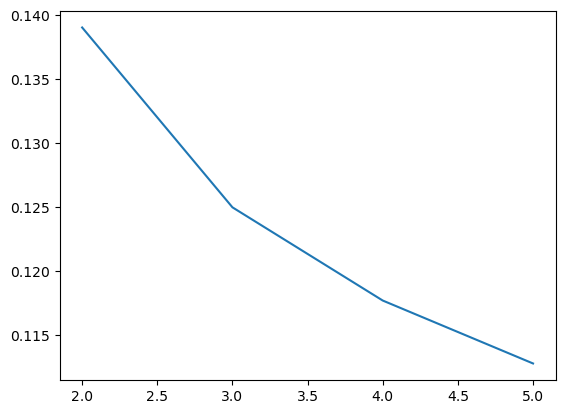

In [315]:
import matplotlib.pyplot as plt
plt.plot(ntest.keys(),ntest.values())

In [316]:
news_df['ngrams'] = news_df['text_tokens_cleaned'].apply(lambda x : list(nltk.ngrams(x,3)))

In [317]:
tempsimMatrix = list()
for index1,row1 in news_df.iterrows():
    for index2,row2 in news_df.iterrows():
        jacdist = nltk.jaccard_distance(set(row1['ngrams']),set(row2['ngrams']))
        apdict = dict({'Article1':index1,'Article2':index2,'Similarity':1-jacdist})
        tempsimMatrix.append(apdict)

In [318]:
simMatrix = pd.DataFrame(tempsimMatrix)
simMatrix

,Article1,Article2,Similarity
0,0,0,1.000000
1,0,1,0.775641
2,0,2,0.000000
3,0,3,0.000000
4,0,4,0.723926
...,...,...,...
1036319,1017,1013,0.000000
1036320,1017,1014,0.000000
1036321,1017,1015,0.000000
1036322,1017,1016,0.000000


In [319]:
news_df['text'].head(40)

0     Lml Bikes Car Dealers - Lml Bikes Showrooms in India Explore  Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersCar NewsBik...
1     Pure Ev Bikes Car Dealers - Pure Ev Bikes Showrooms in India Explore  Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDe

In [320]:
top_similar_indices = simMatrix.query('Article1 != Article2').nlargest(10, 'Similarity')
top_dissimilar_indices = simMatrix.sort_values(by='Similarity', ascending=True).head(10)

In [321]:
top_dissimilar_indices

,Article1,Article2,Similarity
518161,508,1017,0.0
642147,630,807,0.0
642149,630,809,0.0
642150,630,810,0.0
642154,630,814,0.0
642155,630,815,0.0
642156,630,816,0.0
642159,630,819,0.0
642161,630,821,0.0
642162,630,822,0.0


In [322]:
top_similar_indices

,Article1,Article2,Similarity
29560,29,38,0.987302
29561,29,39,0.987302
29568,29,46,0.987302
29683,29,161,0.987302
29928,29,406,0.987302
30185,29,663,0.987302
30368,29,846,0.987302
38713,38,29,0.987302
38723,38,39,0.987302
38730,38,46,0.987302


In [323]:
news_df

,url,date,language,title,text,title_tokens,text_tokens,ngrams,text_tokens_cleaned
0,https://auto.hindustantimes.com/lml-bikes/dealers/bodh-gaya,2022-01-21,en,Lml Bikes Car Dealers - Lml Bikes Showrooms in India,"Lml Bikes Car Dealers - Lml Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersCar NewsBik...","[lml, bikes, car, dealers, lml, bikes, showrooms, india]","[lml, bikes, car, dealers, lml, bikes, showrooms, india, explore, friday, january, log, searchnotificationstop, sectionsauto, newscar, newsbike, newslatestauto, newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact, ussitemaprssterms, useprivacy, policycopyright, ht, media, limited, rights, carsfind, bikescompare, carscompare, bikesemi, calculatordealerscar, newsbike, newslatestauto, new...","[(lml, bikes, car), (bikes, car, dealers), (car, dealers, lml), (dealers, lml, bikes), (lml, bikes, showrooms), (bikes, showrooms, india), (showrooms, india, explore), (india, explore, friday), (explore, friday, january), (friday, january, log), (january, log, searchnotificationstop), (log, searchnotificationstop, sectionsauto), (searchnotificationstop, sectionsauto, newscar), (sectionsauto, newscar, newsbike), (newscar, newsbike, newslatestauto), (newsbike, newslatestauto, newsphotosvideose...","[lml, bikes, car, dealers, lml, bikes, showrooms, india, explore, friday, january, log, searchnotificationstop, sectionsauto, newscar, newsbike, newslatestauto, newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact, ussitemaprssterms, useprivacy, policycopyright, ht, media, limited, rights, carsfind, bikescompare, carscompare, bikesemi, calculatordealerscar, newsbike, newslatestauto, new..."
1,https://auto.hindustantimes.com/pure-ev-bikes/dealers/avadi,2022-01-21,en,Pure Ev Bikes Car Dealers - Pure Ev Bikes Showrooms in India,"Pure Ev Bikes Car Dealers - Pure Ev Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersCar...","[pure, ev, bikes, car, dealers, pure, ev, bikes, showrooms, india]","[pure, ev, bikes, car, dealers, pure, ev, bikes, showrooms, india, explore, friday, january, log, searchnotificationstop, sectionsauto, newscar, newsbike, newslatestauto, newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact, ussitemaprssterms, useprivacy, policycopyright, ht, media, limited, rights, carsfind, bikescompare, carscompare, bikesemi, calculatordealerscar, newsbike, newslates...","[(pure, ev, bikes), (ev, bikes, car), (bikes, car, dealers), (car, dealers, pure), (dealers, pure, ev), (pure, ev, bikes), (ev, bikes, showrooms), (bikes, showrooms, india), (showrooms, india, explore), (india, explore, friday), (explore, friday, january), (friday, january, log), (january, log, searchnotificationstop), (log, searchnotificationstop, sectionsauto), (searchnotificationstop, sectionsauto, newscar), (sectionsauto, newscar, newsbike), (newscar, newsbike, newslatestauto), (newsbike...","[pure, ev, 

In [324]:
result_df = pd.DataFrame(columns=['Article1', 'Text1', 'Article2', 'Text2','Similarity'])

# Iterate through the unique article pairs and populate the result DataFrame
dfs = []

# Iterate through the unique article pairs and populate the list
for index, row in top_similar_indices.iterrows():
    article1_index = int(row['Article1'])
    article2_index = int(row['Article2'])
    similarity = row['Similarity']

    text1 = news_df.loc[article1_index, 'text']
    text2 = news_df.loc[article2_index, 'text']

    dfs.append(pd.DataFrame({
        'Article1': [article1_index],
        'Text1': [text1],
        'Article2': [article2_index],
        'Text2': [text2],
        'Similarity':[similarity]
    }))

# Concatenate the list of DataFrames into the result DataFrame
result_df = pd.concat(dfs, ignore_index=True)


In [325]:
result_df

,Article1,Text1,Article2,Text2,Similarity
0,29,"Toyota Urban Cruiser Car Discount Offers in Kulgam for March 2022 Explore Wednesday, 16 March 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDeal...",38,"Toyota Urban Cruiser Car Discount Offers in Kandhamal for March 2022 Explore Wednesday, 16 March 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorD...",0.987302
1,29,"Toyota Urban Cruiser Car Discount Offers in Kulgam for March 2022 Explore Wednesday, 16 March 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDeal...",39,"Toyota Urban Cruiser Car Discount Offers in Naharlagun for March 2022 Explore Wednesday, 16 March 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculator...",0.987302
2,29,"Toyota Urban Cruiser Car Discount Offers in Kulgam for March 2022 Explore Wednesday, 16 March 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDeal...",46,"Toyota Urban Cruiser Car Discount Offers in Mayurbhanja for March 2022 Explore Wednesday, 16 March 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculato...",0.987302
3,29,"Toyota Urban Cruiser Car Discount Offers in Kulgam for March 2022 Explore Wednesday, 16 March 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDeal...",161,"Toyota Urban Cruiser Car Discount Offers in Nirjuli for March 2022 Explore Wednesday, 16 March 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Med

In [326]:
result = pd.DataFrame(columns=['Article1', 'Text1', 'Article2', 'Text2','Similarity'])

# Iterate through the unique article pairs and populate the result DataFrame
dfs = []

# Iterate through the unique article pairs and populate the list
for index, row in top_dissimilar_indices.iterrows():
    article1_index = int(row['Article1'])
    article2_index = int(row['Article2'])
    similarity = row['Similarity']

    

    text1 = news_df.loc[article1_index, 'text']
    text2 = news_df.loc[article2_index, 'text']

    dfs.append(pd.DataFrame({
        'Article1': [article1_index],
        'Text1': [text1],
        'Article2': [article2_index],
        'Text2': [text2],
        'Similarity': [similarity]
    }))

# Concatenate the list of DataFrames into the result DataFrame
result = pd.concat(dfs, ignore_index=True)


In [327]:
result

,Article1,Text1,Article2,Text2,Similarity
0,508,"The WOpet Sprite automatic feeder is a good low-tech - One News PageSkip to main contentOne News PageTrusted News Discovery Since 2008One News PageTrusted News Discovery Since 2008Global EditionThursday, January 27, 2022HomeOne News Page HomeEditionsGlobalUnited StatesUnited KingdomIndiaNewsFront Page NewsWorldWorld NewsAmericasUnited StatesEuropeUnited KingdomAsia-PacificIndiaAustraliaAfricaMiddle EastPoliticsBusinessBusiness NewsMarketsMoneyCryptocurrenciesProperty / Real EstateLegalCorpor...",1017,"Cornerstone Building Brands, Inc. (NYSE:CNR) Receives $22.83 Consensus Target Price from Analysts - WKRB NewsSkip to main contentHomeAboutDaily Email UpdatesPrivacy Policy ☰MarketsRatingsDividendsEarningsInsider TradesCryptocurrencies HomeAboutDaily Email UpdatesPrivacy Policy MarketsRatingsDividendsEarningsInsider TradesCryptocurrencies Cornerstone Building Brands, Inc. (NYSE:CNR) Receives $22.83 Consensus Target Price from AnalystsPosted by Lisa Pomrenke on Apr 21st, 2022Share on Twitter...",0.0
1,630,"Renault Car Dealers in Hapur- Nearest Renault Showrooms in Hapur Explore Saturday, 30 April 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealer...",807,Lloyds CEO Says Bank Will Look Into More Fintech Acquisitions - BNN BloombergAre you looking for a stock?Try one of these{{result.description}}{{result.ric}}More ResultsBNNAre you looking for a stock?Try one of these{{result.description}}{{result.ric}}More ResultsLiveVideoShowsMarket CallMarketsInvestingPersonal FinanceReal EstateCompany NewsCommoditiesEconomicsPoliticsTechnologyBloomberg News Wire OpinionETFsExecutivePursuitsInternationalMarket CallScheduleListenLiveVideoShowsMarket Cal...,0.0
2,630,"Renault Car Dealers in Hapur- Nearest Renault Showrooms in Hapur Explore Saturday, 30 April 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealer...",809,Tether Says There Is No Chinese Corporate IOUs Among Its Reserves - BNN BloombergAre you looking for a stock?Try one of these{{result.description}}{{result.ric}}More ResultsBNNAre you looking for a stock?Try one of these{{result.description}}{{result.ric}}More ResultsLiveVideoShowsMarket CallMarketsInvestingPersonal FinanceReal EstateCompany NewsCommoditiesEconomicsPoliticsTechnologyBloomberg News Wire OpinionETFsExecutivePursuitsInternationalMarket CallScheduleListenLiveVideoShowsMarket...,0.0
3,630,"Renault Car Dealers in Hapur- Nearest Renault Showrooms in Hapur Explore Saturday, 30 April 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealer...",810,"Renault Group, Minth Group to create JV to produce battery casings for EVs - Green Car Congress Home About Contact RSS GCC Twitter NewsletterHomeAboutContactRSSGCC TwitterNewsletterBASF to build commercial-scale battery recycling black mass plant in Schwarzheide, German...",0.0
4,630,"Renault Car Dealers in Hapur- Nearest Renault Showrooms in Hapur Explore Saturday, 30 April 2022 Log in/Sign up SearchNot

In [330]:
tweets_df['text_tokens_cl'] = tweets_df['text_tokens'].apply(lambda x: 
    [token.lower() for token in tokenizer.tokenize(str(x)) 
     if token.lower() not in stop_words and len(token) > 1 and not token.isnumeric()]
)

In [328]:
tweets_df['text_tokens'] = tweets_df['text'].apply(lambda x : clean_text(x))

In [331]:
tweets_df

,id,lang,date,name,retweeted,text,text_tokens,ngrams,text_tokens_cl
0,1491880241782005777,en,2022-02-10,Sir Botalot dropping the Mike!,,@singervehicles Will you do a straight swap for my Renault Twingo 1.2 Extreme? \n\nThat is awesome! 🔥,will you do a straight swap for my renault twingo 12 extreme that is awesome,"[( , w, i, l), (w, i, l, l), (i, l, l, ), (l, l, , y), (l, , y, o), ( , y, o, u), (y, o, u, ), (o, u, , d), (u, , d, o), ( , d, o, ), (d, o, , a), (o, , a, ), ( , a, , s), (a, , s, t), ( , s, t, r), (s, t, r, a), (t, r, a, i), (r, a, i, g), (a, i, g, h), (i, g, h, t), (g, h, t, ), (h, t, , s), (t, , s, w), ( , s, w, a), (s, w, a, p), (w, a, p, ), (a, p, , f), (p, , f, o), ( , f, o, r), (f, o, r, ), (o, r, , m), (r, , m, y), ( , m, y, ), (m, y, , r), (y, , r, e), ( , r...","[straight, swap, renault, twingo, extreme, awesome]"
1,1501237946590142469,en,2022-03-08,Sabrina Ghio,RT,"Australian GP Qualifying, Melbourne, 8th March 1997. #F1 The Grid ⬇️\n\nRow 3:\n5. Eddie Irvine (Ferrari) +2.512s\n6. Mika Hakkinen (McLaren-Mercedes) +2.602s\n\nRow 4:\n7. Johnny Herbert (Sauber-Petronas) +2.918s\n8. Jean Alesi (Benetton-Renault) +3.224s https://t.co/i4IC4LzVVN",australian gp qualifying melbourne 8th march 1997 the grid row 3 5 eddie irvine ferrari 2512s 6 mika hakkinen mclarenmercedes 2602s row 4 7 johnny herbert sauberpetronas 2918s 8 jean alesi benettonrenault 3224s,"[(a, u, s, t), (u, s, t, r), (s, t, r, a), (t, r, a, l), (r, a, l, i), (a, l, i, a), (l, i, a, n), (i, a, n, ), (a, n, , g), (n, , g, p), ( , g, p, ), (g, p, , q), (p, , q, u), ( , q, u, a), (q, u, a, l), (u, a, l, i), (a, l, i, f), (l, i, f, y), (i, f, y, i), (f, y, i, n), (y, i, n, g), (i, n, g, ), (n, g, , m), (g, , m, e), ( , m, e, l), (m, e, l, b), (e, l, b, o), (l, b, o, u), (b, o, u, r), (o, u, r, n), (u, r, n, e), (r, n, e, ), (n, e, , 8), (e, , 8, t), ( , 8, t, h), (8, t...","[australian, gp, qualifying, melbourne, 8th, march, grid, row, eddie, irvine, ferrari, 2512s, mika, hakkinen, mclarenmercedes, 2602s, row, johnny, herbert, sauberpetronas, 2918s, jean, alesi, benettonrenault, 3224s]"
2,1505982695129718784,en,2022-03-21,Colin N. Walker 🏴󠁧󠁢󠁳󠁣󠁴󠁿 🇪🇺💙😷 #FBPE,RT,#BoycottRenault\n\nThink of the blood of thousands of Ukrainian women and children pouring from every Renault car. \n\nhttps://t.co/rbU01Sy9DU,think of the blood of thousands of ukrainian women and children pouring from every renault car,"[( , , t, h), ( , t, h, i), (t, h, i, n), (h, i, n, k), (i, n, k, ), (n, k, , o), (k, , o, f), ( , o, f, ), (o, f, , t), (f, , t, h), ( , t, h, e), (t, h, e, ), (h, e, , b), (e, , b, l), ( , b, l, o), (b, l, o, o), (l, o, o, d), (o, o, d, ), (o, d, , o), (d, , o, f), ( , o, f, ), (o, f, , t), (f, , t, h), ( , t, h, o), (t, h, o, u), (h, o, u, s), (o, u, s, a), (u, s, a, n), (s, a, n, d), (a, n, d, s), (n, d, s, ), (d, s, , o), (s, , o, f), ( , o, f, ), (o, f, , u), (f, ...","[think, blood, thousands, ukrainian, women, children, pouring, every, renault, car]"
3,1516744110463463426,en,2022-04-20,Yvette Lissman,RT,"Almost 200,000 workers in Russia still on western payrolls\n\nMcDonald’s, IKEA, Renault, Levi Strauss, &amp;others pay salaries to thousands of their employees while their operations in🇷🇺are suspended\nCoca-Cola, Yum Brands,KFC didn't confirm if they still pay🇷🇺s https://t.co/KWDhCo1dM0",almost 200000 workers in russia still on western payrolls mcdonalds ikea renault levi strauss ampothers pay salaries to thousands of their employees while their operations inare suspended cocacola yum brandskfc didnt confirm if they still pays,"[(a, l, m, o), (l, m, o, s), (m, o, s, t), (o, s, t, ), (s, t, , 2), (t, , 2, 0), ( , 2, 0, 0), (2, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, ), (0, 0, , w), (0, , w, o), ( , w, o, r), (w, o, r, k), (o, r, k, e), (r, k, e, r), (k, e, r, s), (e, r, s, ), (r, s, , i), (s, , i, n), ( , i, n, ), (i, n, , r), (n, , r, u), ( , r, u, s), (r, u, s, s), (u, s, s, i), (s, s, i, a), (s, i, a, ), (i, a, , s), (a, , s, t), ( , s, t, i),

In [332]:
testset1 = tweets_df['text_tokens_cl'].sample(n=200)
testset1 = pd.DataFrame(testset1)
testset1

,text_tokens_cl
993,"[vitesco, renault, partner, powertrain, box]"
147,"[bluebell, season, favourite, season, panorama, blue, renault, trafic, upholstered, ecosuede, metal, zafiro, fits, right, among, pretty, spring, backdrop]"
439,"[ukraine, calls, renault, boycott, companys, refusal, leave, russia]"
656,"[suddenly, renault, kwid, looks, hella, attractive]"
296,"[isolated, groups, neurons, trying, connect, microtunnels, captured, timelapse, microscope, credit, dr, renaud, renault]"
...,...
195,"[hundreds, thousands, russians, lose, jobs, ikea, closing, jobs, togliatti, factory, renaultnissan, stoppping, lack, imported, parts, jobs, blow, regular, people]"
930,"[renault, said, mull, curbing, russia, operations, ukraine]"
996,"[one, week, left, make, rewards, voting, favourite, housemate, could, win, r20, stand, chance, win, awesome, renault, vote, nobrainer]"
294,"[finally, boulognebillancourt, board, directors, renault, group, met, today, approved, following, items, renault, group, activities, manufacturing, plant, moscow, suspended, today]"


In [335]:
ntest = dict.fromkeys(range(2,6))
for k in ntest.keys():
    jaccarddist = list()
    for index1,row1 in testset1.iterrows():
        for index2,row2 in testset1.iterrows():
            if (len(row1['text_tokens_cl'])>=k) & (len(row2['text_tokens_cl'])>=k):
                
                ngram1 = set(nltk.ngrams(row1['text_tokens_cl'],k))
                ngram2 = set(nltk.ngrams(row2['text_tokens_cl'],k))
                jaccarddist.append(1 - nltk.jaccard_distance(ngram1,ngram2))
        ntest[k] = sum(jaccarddist)/len(jaccarddist)

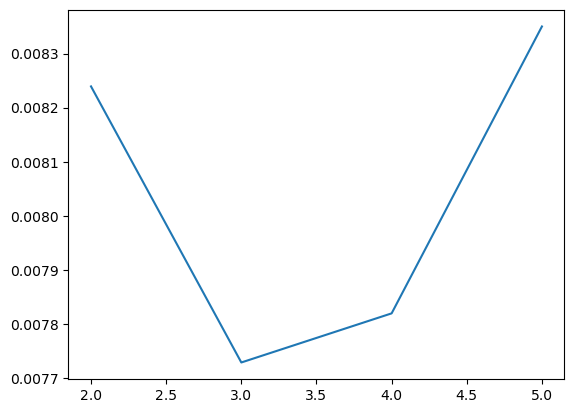

In [336]:
import matplotlib.pyplot as plt
plt.plot(ntest.keys(),ntest.values())

In [337]:
tweets_df['ngrams'] = tweets_df['text_tokens_cl'].apply(lambda x : list(nltk.ngrams(x,4)))

In [338]:
tempsimMatrix1 = list()
for index1,row1 in tweets_df.iterrows():
    for index2,row2 in tweets_df.iterrows():
        if (len(row1['text_tokens_cl'])>=k) & (len(row2['text_tokens_cl'])>=k):
            jacdist = nltk.jaccard_distance(set(row1['ngrams']),set(row2['ngrams']))
            apdict = dict({'Article1':index1,'Article2':index2,'Similarity':1-jacdist})
            tempsimMatrix1.append(apdict)

In [339]:
simMat = pd.DataFrame(tempsimMatrix1)
simMat

,Article1,Article2,Similarity
0,0,0,1.0
1,0,1,0.0
2,0,2,0.0
3,0,3,0.0
4,0,4,0.0
...,...,...,...
891131,1019,1015,0.0
891132,1019,1016,0.0
891133,1019,1017,0.0
891134,1019,1018,0.0


In [340]:
simMat = simMat.sort_values('Similarity')

In [341]:
simMat

,Article1,Article2,Similarity
445567,510,1019,0.0
591413,675,508,0.0
591414,675,509,0.0
591415,675,510,0.0
591416,675,511,0.0
...,...,...,...
435047,499,868,1.0
435046,499,867,1.0
434924,499,737,1.0
434852,499,661,1.0


In [342]:
similar = simMat.query('Article1 != Article2').nlargest(10, 'Similarity')
dissimilar = simMat.sort_values(by='Similarity', ascending=True).head(10)

In [343]:
similar

,Article1,Article2,Similarity
211535,238,84,1.0
211527,238,75,1.0
211498,238,45,1.0
211497,238,43,1.0
211490,238,36,1.0
210992,237,522,1.0
210637,237,130,1.0
209025,235,437,1.0
211562,238,111,1.0
207387,233,701,1.0


In [344]:
dissimilar

,Article1,Article2,Similarity
445567,510,1019,0.0
815,0,876,0.0
816,0,877,0.0
817,0,879,0.0
818,0,880,0.0
819,0,881,0.0
820,0,883,0.0
821,0,885,0.0
822,0,887,0.0
823,0,888,0.0


In [345]:
result = pd.DataFrame(columns=['Article1', 'Text1', 'Article2', 'Text2','Similarity'])

# Iterate through the unique article pairs and populate the result DataFrame
dfs = []

# Iterate through the unique article pairs and populate the list
for index, row in similar.iterrows():
    article1_index = int(row['Article1'])
    article2_index = int(row['Article2'])
    similarity = row['Similarity']

    

    text1 = tweets_df.loc[article1_index, 'text']
    text2 = tweets_df.loc[article2_index, 'text']

    dfs.append(pd.DataFrame({
        'Article1': [article1_index],
        'Text1': [text1],
        'Article2': [article2_index],
        'Text2': [text2],
        'Similarity': [similarity]
    }))

# Concatenate the list of DataFrames into the result DataFrame
result = pd.concat(dfs, ignore_index=True)
result

,Article1,Text1,Article2,Text2,Similarity
0,238,"Renault refuses to pull out of Russia. Not that it should surprise anyone when Renault supports a brutal war of aggression in Europe. But mistakes must come with a price, especially when repeated. I call on customers and businesses around the globe to boycott Group Renault. https://t.co/STFeafnCoi",84,"Renault refuses to pull out of Russia. Not that it should surprise anyone when Renault supports a brutal war of aggression in Europe. But mistakes must come with a price, especially when repeated. I call on customers and businesses around the globe to boycott Group Renault. https://t.co/STFeafnCoi",1.0
1,238,"Renault refuses to pull out of Russia. Not that it should surprise anyone when Renault supports a brutal war of aggression in Europe. But mistakes must come with a price, especially when repeated. I call on customers and businesses around the globe to boycott Group Renault. https://t.co/STFeafnCoi",75,"Renault refuses to pull out of Russia. Not that it should surprise anyone when Renault supports a brutal war of aggression in Europe. But mistakes must come with a price, especially when repeated. I call on customers and businesses around the globe to boycott Group Renault. https://t.co/STFeafnCoi",1.0
2,238,"Renault refuses to pull out of Russia. Not that it should surprise anyone when Renault supports a brutal war of aggression in Europe. But mistakes must come with a price, especially when repeated. I call on customers and businesses around the globe to boycott Group Renault. https://t.co/STFeafnCoi",45,"Renault refuses to pull out of Russia. Not that it should surprise anyone when Renault supports a brutal war of aggression in Europe. But mistakes must come with a price, especially when repeated. I call on customers and businesses around the globe to boycott Group Renault. https://t.co/STFeafnCoi",1.0
3,238,"Renault refuses to pull out of Russia. Not that it should surprise anyone when Renault supports a brutal war of aggression in Europe. But mistakes must come with a price, especially when repeated. I call on customers and businesses around the globe to boycott Group Renault. https://t.co/STFeafnCoi",43,"Renault refuses to pull out of Russia. Not that it should surprise anyone when Renault supports a brutal war of aggression in Europe. But mistakes must come with a price, especially when repeated. I call on customers and businesses around the globe to boycott Group Renault. https://t.co/STFeafnCoi",1.0
4,238,"Renault refuses to pull out of Russia. Not that it should surprise anyone when Renault supports a brutal war of aggression in Europe. But mistakes must come with a price, especially when repeated. I call on customers and businesses around the globe to boycott Group Renault. https://t.co/STFeafnCoi",36,"Renault refuses to pull out of Russia. Not that it should surprise anyone when Renault supports a brutal war of aggression in Europe. But mistakes must come with a price, especially when repeated. I call on customers and businesses around the globe to boycott Group Renault. https://t.co/STFeafnCoi",1.0
5,237,Renault Group suspends activities in Russia. https://t.co/h0tw44rhz1,522,Renault Group suspends activities in Russia. https://t.co/h0tw44rhz1,1.0
6,237,Renault Group suspends activities in Russia. https://t.co/h0tw44rhz1,130,Renault Group suspends activities in Russia. https://t.co/h0tw44rhz1,1.0
7,235,"We wish Fernando the best for his future in Formula 1. Fernando has always been, and always will be, part of the Renault and Alpine family and we’re proud and privileged to have shared so many on-track moments together. https://t.co/hyZOVdOKHb",437,"We wish Fernando the best for his future in Formula 1. Fernando has always been, and always will be, part of the Renault and Alpine family and we’re proud and privileged to have shared so many on-track moments together. https://t.co/hyZOVdOKHb",1.0
8,238,"Renault refuses to pull out of Russia. Not that it should surprise

In [346]:
result1 = pd.DataFrame(columns=['Article1', 'Text1', 'Article2', 'Text2','Similarity'])

# Iterate through the unique article pairs and populate the result DataFrame
dfs = []

# Iterate through the unique article pairs and populate the list
for index, row in dissimilar.iterrows():
    article1_index = int(row['Article1'])
    article2_index = int(row['Article2'])
    similarity = row['Similarity']

    

    text1 = tweets_df.loc[article1_index, 'text']
    text2 = tweets_df.loc[article2_index, 'text']

    dfs.append(pd.DataFrame({
        'Article1': [article1_index],
        'Text1': [text1],
        'Article2': [article2_index],
        'Text2': [text2],
        'Similarity': [similarity]
    }))

# Concatenate the list of DataFrames into the result DataFrame
result1 = pd.concat(dfs, ignore_index=True)
result1

,Article1,Text1,Article2,Text2,Similarity
0,510,Did you know that the design of the #renault Espace was based on the #TGV - I didn’t ! #sncf https://t.co/d6GhkiTLnd,1019,"I noticed something, a single different motor per manufacturer just died in this race\n\nTsunoda (Honda)\nAlonso (Renault)\nBottas (Ferrari)\nRicciardo (Mercedes Benz)",0.0
1,0,@singervehicles Will you do a straight swap for my Renault Twingo 1.2 Extreme? \n\nThat is awesome! 🔥,876,Today’s Ocontent:\n\nTo celebrate the first Race Week of 2022 I’d like to give away a special car.\n\nEsteban’s first podium in F1\nRenault R.S.20 - Sakhir GP 2020.\nMinichamp 1/43 scale.\n\nJust like it and retweet it.\nI’ll find a lucky winner from my followers by Race Day. https://t.co/KcskKJ6W4k,0.0
2,0,@singervehicles Will you do a straight swap for my Renault Twingo 1.2 Extreme? \n\nThat is awesome! 🔥,877,"After Renault announced its departure this week from the Russian auto market amid the country's war with Ukraine, Moscow's mayor announced its factory will be used to restart the defunct Soviet-era Moskvich car brand. https://t.co/F3pRGrtYQX",0.0
3,0,@singervehicles Will you do a straight swap for my Renault Twingo 1.2 Extreme? \n\nThat is awesome! 🔥,879,#Renault will soon unveil its car vision of #sustainability: a unique concept car that embodies the Group's sustainable development commitments. Get ready to discover it at @ChangeNOW_world on May 19! 🌎\nTo learn more: https://t.co/N1RjPZoOpc https://t.co/uH5pnWi1aB,0.0
4,0,@singervehicles Will you do a straight swap for my Renault Twingo 1.2 Extreme? \n\nThat is awesome! 🔥,880,Citroën and Renault make FWD cars (french-wheel-drive),0.0
5,0,@singervehicles Will you do a straight swap for my Renault Twingo 1.2 Extreme? \n\nThat is awesome! 🔥,881,We thank #91wheels for honouring #RenaultKiger as the 'SUV of the Year'. It's a matter of great joy to everyone at Renault to celebrate the much-loved vehicle's first anniversary with laurels and rewards. \n\nHere's looking forward to another exciting year ahead. https://t.co/quMjucT3qE,0.0
6,0,@singervehicles Will you do a straight swap for my Renault Twingo 1.2 Extreme? \n\nThat is awesome! 🔥,883,"@JustGregAllen @F1 @McLarenF1 the renault was a quicker car? plus, literally what does that matter? lando is beating his ass rn in the same car. which proves even further that with a better car, they still couldnt beat mclaren in the constructors",0.0
7,0,@singervehicles Will you do a straight swap for my Renault Twingo 1.2 Extreme? \n\nThat is awesome! 🔥,885,REVIEW: Renault Megane E-Tech Electric 60kWh Limited Edition\n\nFrom haptics to handling this is a car that repositions Renault in the electric car market and has huge potential to satisfy car buyers. \n\nFind out more in our review. https://t.co/Dm7rqkRWYb https://t.co/lPWpEW8Sad,0.0
8,0,@singervehicles Will you do a straight swap for my Renault Twingo 1.2 Extreme? \n\nThat is awesome! 🔥,887,Renault/VW: De Meo shows greater realism than Diess with Russia exit via @FT\n https://t.co/jGMr7FwfkD,0.0
9,0,@singervehicles Will you do a straight swap for my Renault Twingo 1.2 Extreme? \n\nThat is awesome! 🔥,888,"Reenacting the @sainsburyarch photos in 2022 at the Huddersfield Shorehead store 🥹🥹🥹. I’m going to guess this is a 1994/95 photo. \n\nPs. If this is your Renault, it’s incredible. Top marks for taking her on the supermarket run https://t.co/urdmJ95iKR",0.0
